In [29]:
import pandas as pd

cohort = pd.read_csv('./eicu_cohort.csv')

cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'])
cohort['gender'] = pd.Categorical(cohort['gender'])

cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort['gender_enc'] = cohort['gender'].cat.codes

cohort_enc = cohort.drop(['actualhospitalmortality', 'gender'], axis=1)

### Recap - Fit ICU data to logistic regression using all features

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

x = cohort_enc.drop('actualhospitalmortality_enc', axis=1)
y = cohort_enc['actualhospitalmortality_enc']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

scaler = MinMaxScaler()
scaler.fit(x_train)
x_apache_train = scaler.transform(x_train)
x_apache_test = scaler.transform(x_test)

model_1 = LogisticRegression()
model_1 = model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

/home/jiajia/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Fit our data into logistic regression with all 13 features, with max iteration set to 1000

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

x = cohort_enc.drop('actualhospitalmortality_enc', axis=1)
y = cohort_enc['actualhospitalmortality_enc']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

scaler = MinMaxScaler()
scaler.fit(x_train)
x_apache_train = scaler.transform(x_train)
x_apache_test = scaler.transform(x_test)

model_2 = LogisticRegression(max_iter=1000)
model_2 = model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

### Compare two models by creating confusion matrices

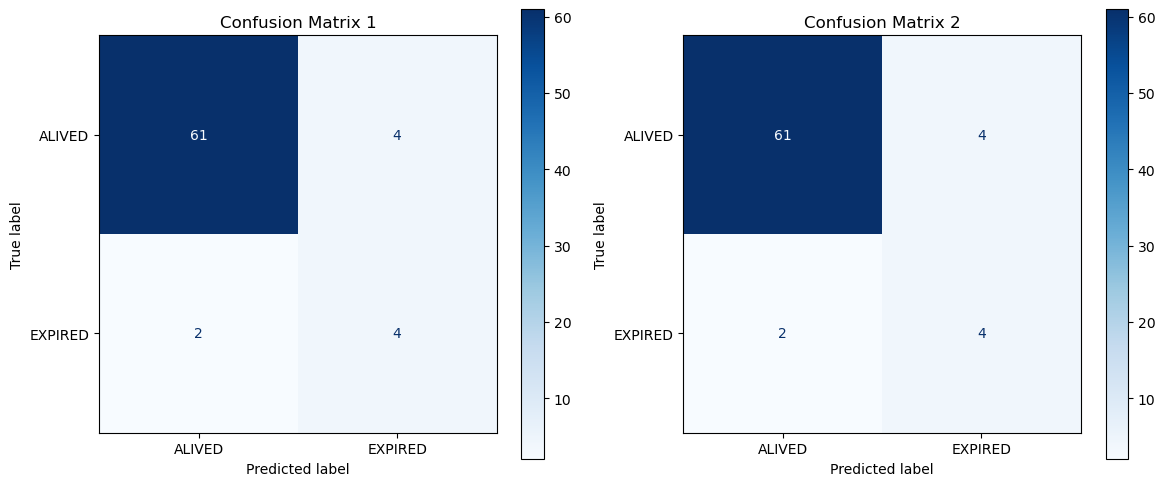

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_1 = confusion_matrix(y_test, y_pred_1, labels=[0, 1])
cm_2 = confusion_matrix(y_test, y_pred_2, labels=[0, 1])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=["ALIVED", "EXPIRED"])
disp_1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix 1')

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=["ALIVED", "EXPIRED"])
disp_2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix 2')

plt.tight_layout()
plt.show()

### Read in Melbourne Housing Snapshot and have a glimpse

In [33]:
import pandas as pd

housing = pd.read_csv('./melb_data.csv')
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Check missing values

In [34]:
housing.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Check data types

In [35]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### Drop columns "Address", "Distance", "Postcode", "CouncilArea", "Lattitude", "Longtitude", "Regionname", and "Propertycount"

In [36]:
housing_dropped = housing.drop(["Address", "Distance", "Postcode", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount"], axis=1)

### Encode columns "Suburb", "Type", "Method", "SellerG", and "Date"

In [37]:
columns_to_convert = ['Suburb', 'Type', 'Method', 'SellerG', 'Date']

housing_dropped[columns_to_convert] = housing_dropped[columns_to_convert].astype('category')

for i in columns_to_convert:
    housing_dropped[f'{i}_enc'] = housing_dropped[i].cat.codes

housing_enc = housing_dropped.drop(columns_to_convert, axis=1)

### Fit to linear regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

x = housing_enc.drop('Price', axis=1)
y = housing_enc['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_train.median())

scaler = MinMaxScaler()
scaler.fit(x_train)
x_apache_train = scaler.transform(x_train)
x_apache_test = scaler.transform(x_test)

model = LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Evaluate the model with Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R-squared, and Adjusted R-squared

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = len(y_test)  
k = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Absolute Error (MAE): 343753.722049045
Mean Squared Error (MSE): 257535208129.36462
Root Mean Squared Error (RMSE): 507479.26866953354
R-squared (R2): 0.386808770720491
Adjusted R-squared: 0.3849968291417286


### Calculate residuals

In [40]:
residuals = y_test - y_pred

### Create Residual vs. Fitted Plot

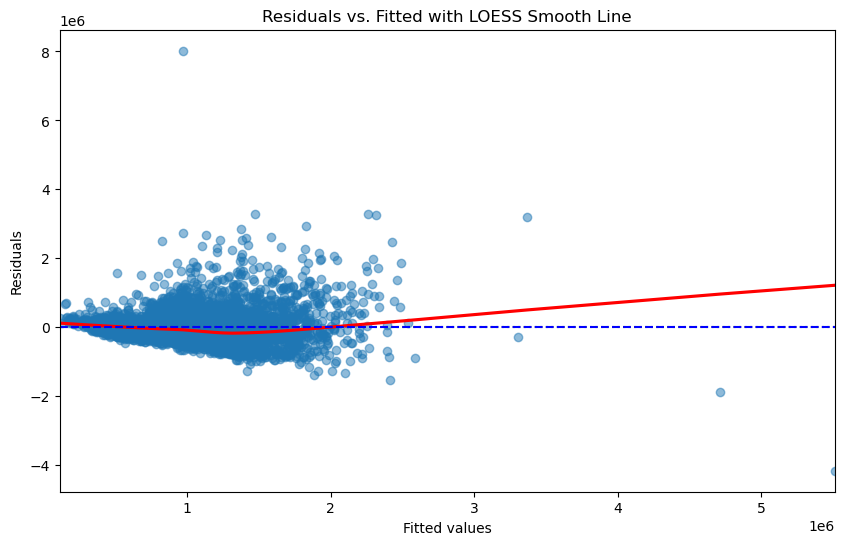

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted with LOESS Smooth Line')
plt.show()

### Create a Q-Q plot

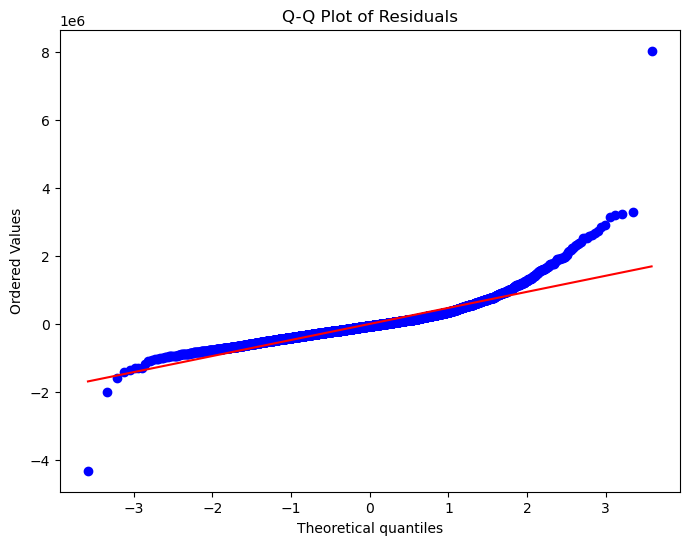

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Create a histogram of residuals

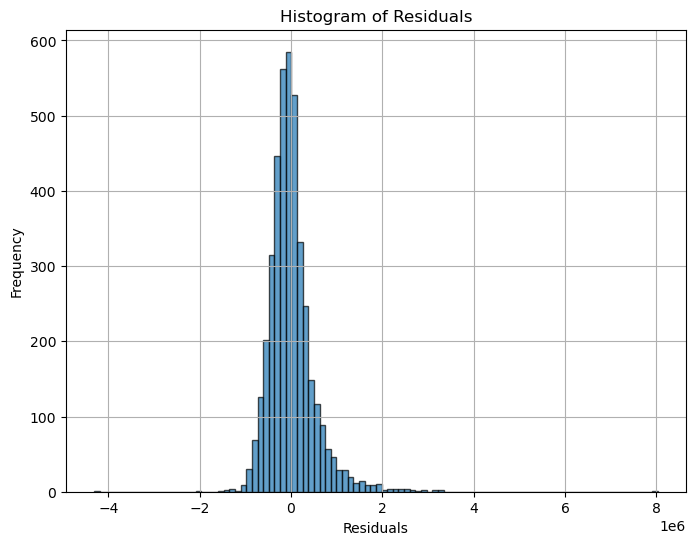

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=100, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Create a Residuals vs. Predictor plot

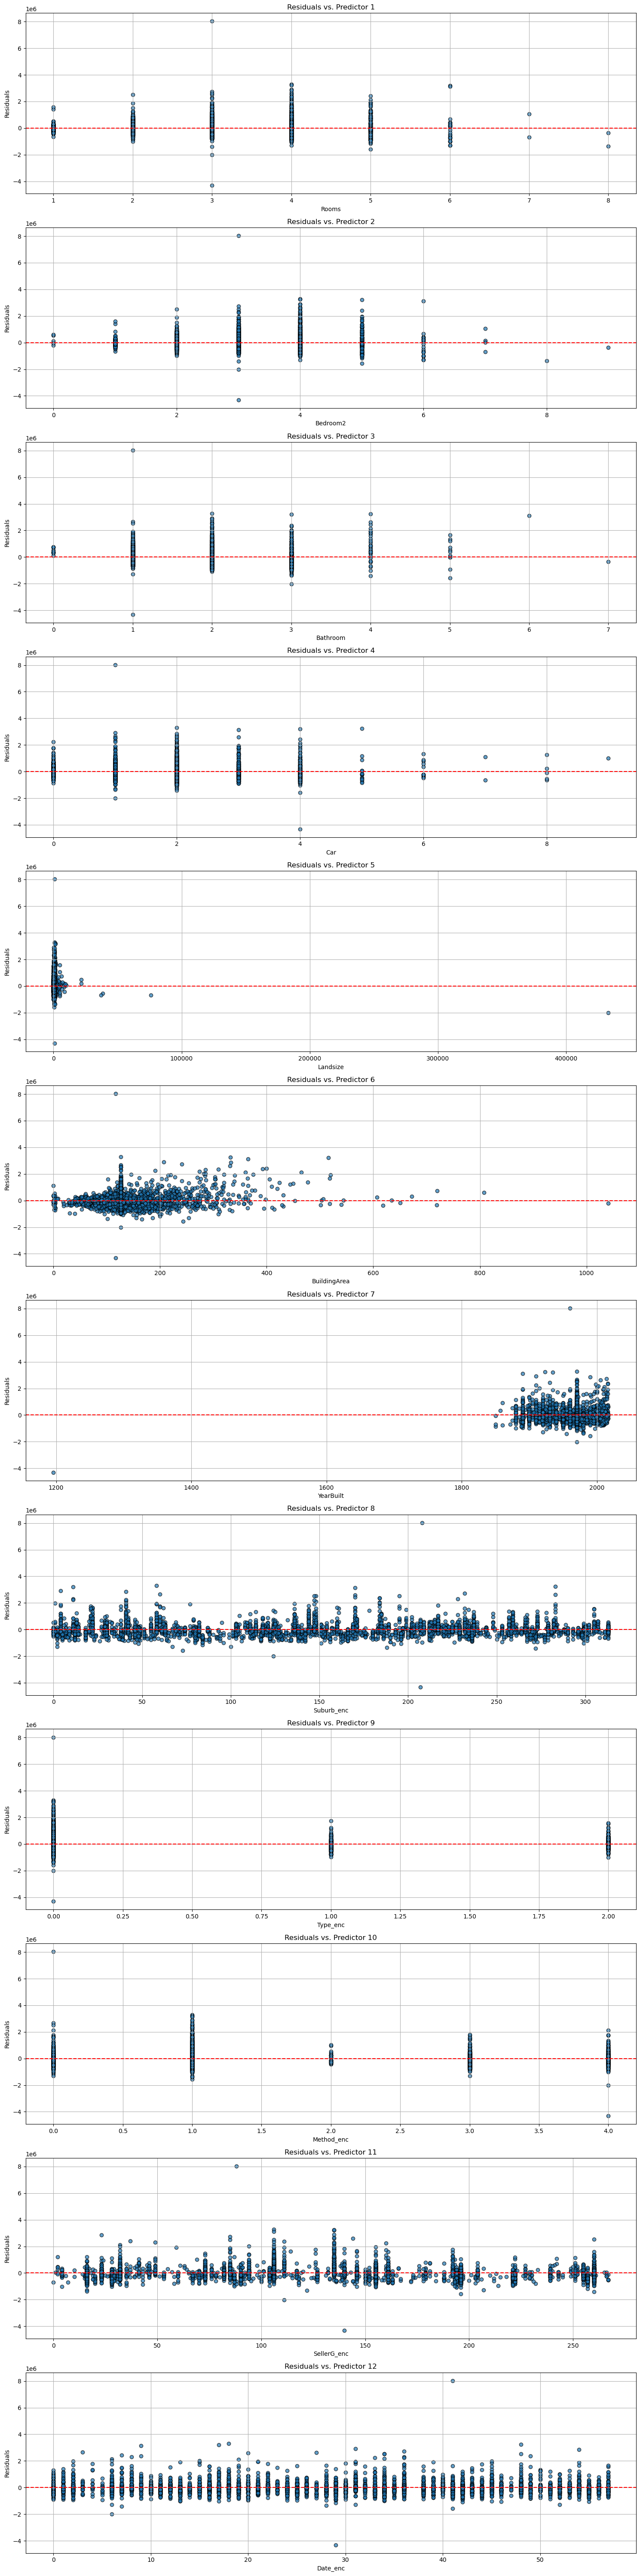

In [44]:
import matplotlib.pyplot as plt

num_predictors = x_test.shape[1]
plt.figure(figsize=(15, 5 * num_predictors))

for i in range(num_predictors):
    plt.subplot(num_predictors, 1, i + 1)
    plt.scatter(x_test.iloc[:, i], residuals, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f'Residuals vs. Predictor {i + 1}')
    plt.xlabel(x_test.columns[i])
    plt.ylabel('Residuals')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Fit Melbourne Housing dataset to Ridge Regression, Lasso Regression, Elastic Net, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, Support Vector Regression, and Neural Networks

In [45]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

y_pred_ridge = ridge_model.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression R²: {r2_ridge}")

Ridge Regression RMSE: 507478.94058684283
Ridge Regression R²: 0.38680956357007457


In [46]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

y_pred_lasso = lasso_model.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {rmse_lasso}")
print(f"Lasso Regression R²: {r2_lasso}")

Lasso Regression MSE: 507479.26077416696
Lasso Regression R²: 0.3868087898005593


In [47]:
from sklearn.linear_model import ElasticNet

alpha = 0.1
l1_ratio = 0.5
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=0)
model.fit(x_train, y_train)

y_pred_elastic = model.predict(x_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Elastic Net MSE: {rmse_elastic}")
print(f"Elastic Net R2: {r2_elastic}")

Elastic Net MSE: 508118.00183765264
Elastic Net R2: 0.385264226604075


In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression MSE: {rmse_tree}")
print(f"Decision Tree Regression R²: {r2_tree}")

Decision Tree Regression MSE: 575300.507028018
Decision Tree Regression R²: 0.21195895682150967


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression MSE: {rmse_rf}")
print(f"Random Forest Regression R²: {r2_rf}")

Random Forest Regression MSE: 402304.6644611225
Random Forest Regression R²: 0.6146374921523043


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression MSE: {rmse_gb}")
print(f"Gradient Boosting Regression R²: {r2_gb}")

Gradient Boosting Regression MSE: 403262.3683521241
Gradient Boosting Regression R²: 0.61280056361836


In [51]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(x_train, y_train)

y_pred_svr = svr_model.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression MSE: {rmse_svr}")
print(f"Support Vector Regression R²: {r2_svr}")

Support Vector Regression MSE: 673364.5704709798
Support Vector Regression R²: -0.07959247207807452


In [52]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100,100,100,20,), max_iter=1000, random_state=42)
nn_model.fit(x_train, y_train)

y_pred_nn = nn_model.predict(x_test)

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Regression MSE: {rmse_nn}")
print(f"Neural Network Regression R²: {r2_nn}")

Neural Network Regression MSE: 483752.4334641637
Neural Network Regression R²: 0.4428070034304389


In [53]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression RMSE: {rmse_xgb}")
print(f"XGBoost Regression R²: {r2_xgb}")

XGBoost Regression RMSE: 344761.92152109696
XGBoost Regression R²: 0.7169925235362481


# Title

How to write Markdown text. 

## List

* __item 1__: __Bold__
* _item 2_: _italic_
* item 3: [link](https://chatgpt.com/c/78263e74-43e0-4b71-b2ab-2bec8281849a)
* item 4: ![image](https://cdn-icons-png.flaticon.com/512/5968/5968350.png)

1. item 1
2. item 2
3. item 3

### Subtitle 3
#### Subtitle 4